In [1]:
#Steps
#1 Read, understand and visualize the data
#2 Prepare the data for modelling (train-test split, rescaling)
#3 Training the model 
#4 Residual analysis
#5 Predictions and evaluations on test set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

### Read, understand, and visualize the data
- Load the data
- Understand what each column stands for.
- Check for missing (null) or incorrect data
- Data Visualization - To understand the relationship between different features and the target variable, in this case 'cnt'

In [3]:
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesharing.shape

(730, 16)

In [5]:
bikesharing.info()
#No null values found in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Visualization

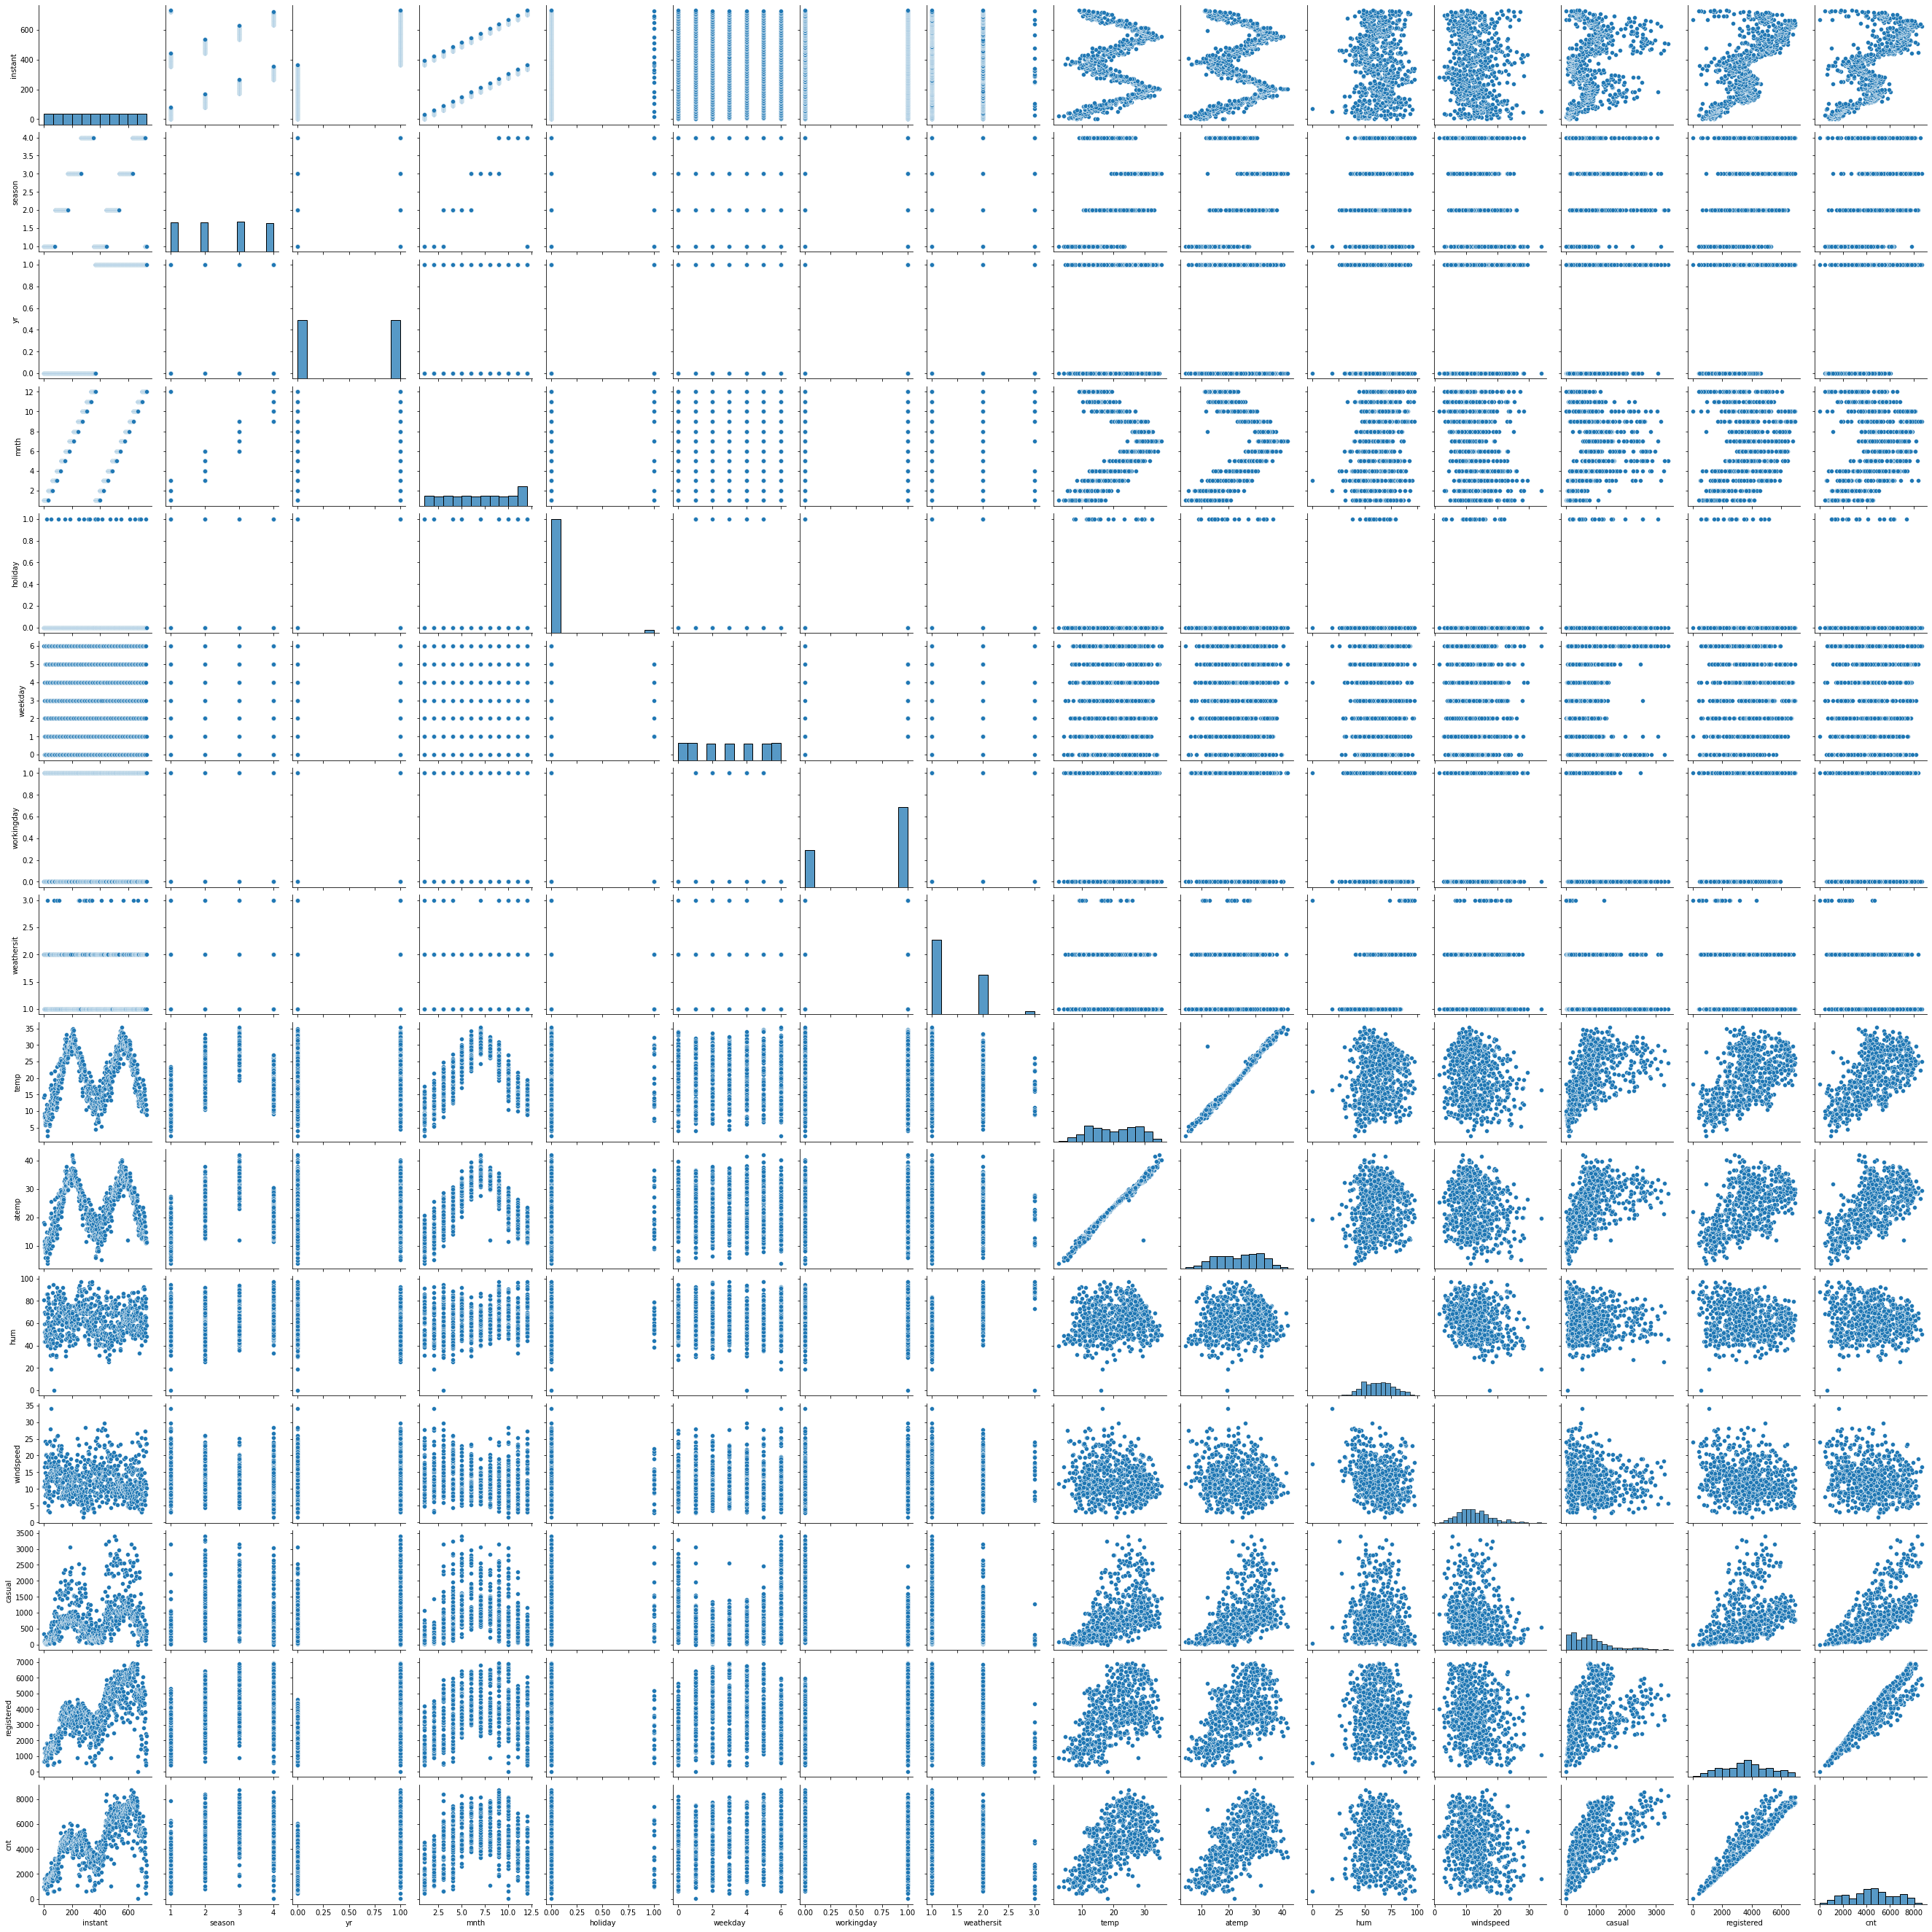

In [7]:
#Visualizing numeric variables
sns.pairplot(bikesharing)
plt.show()

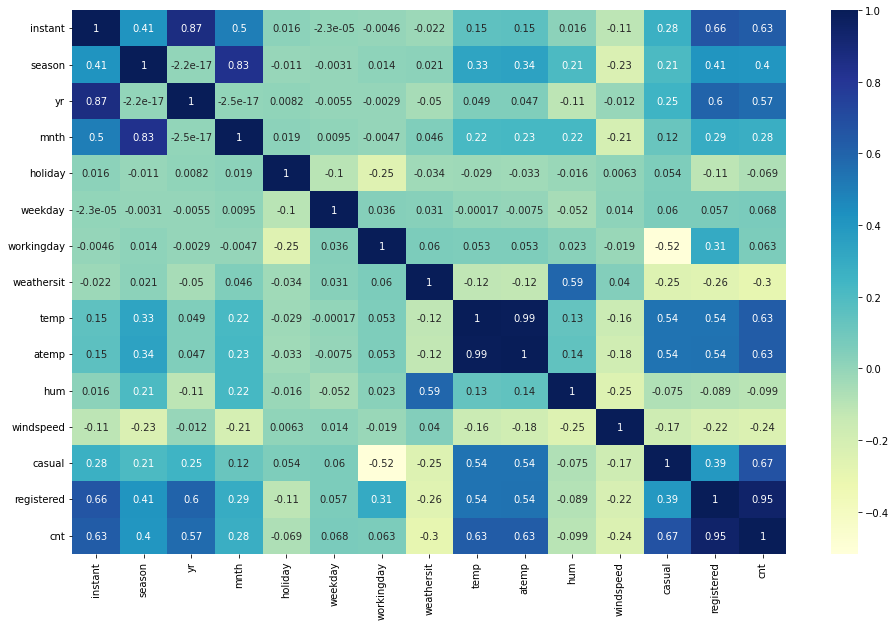

In [8]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikesharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

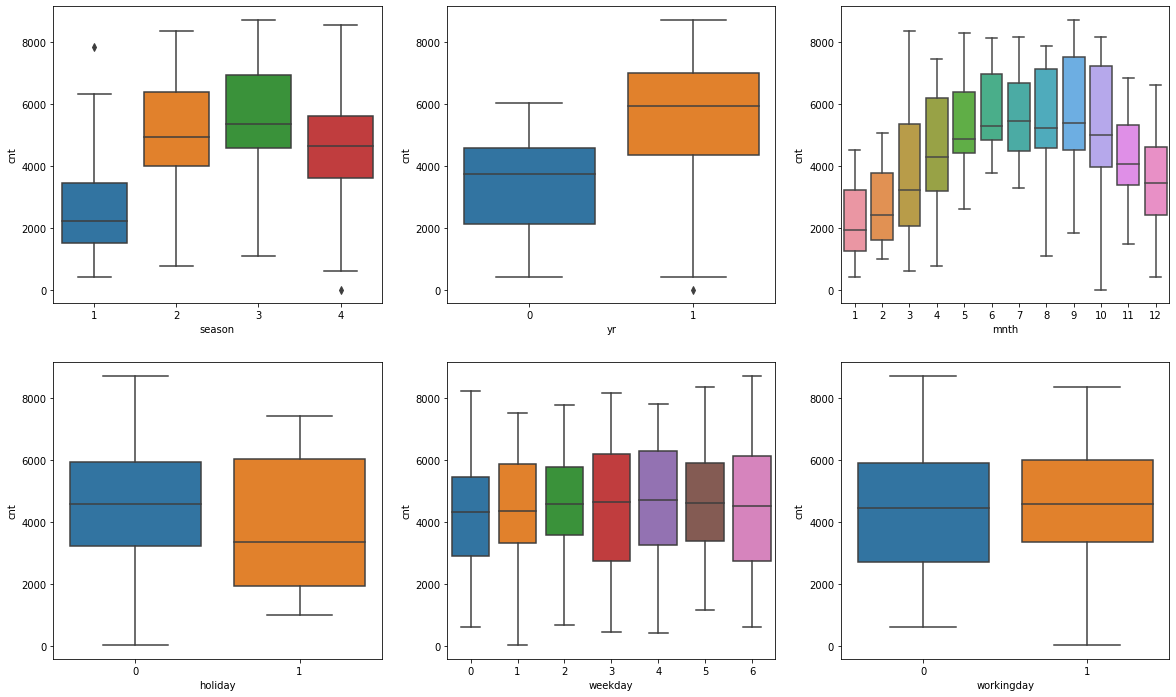

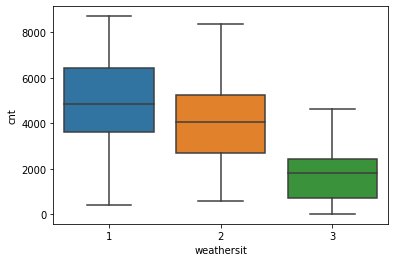

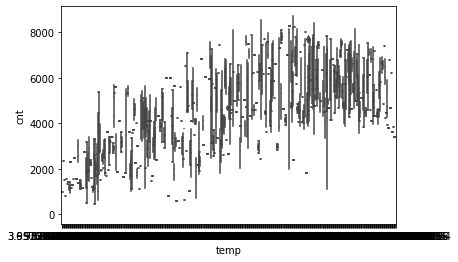

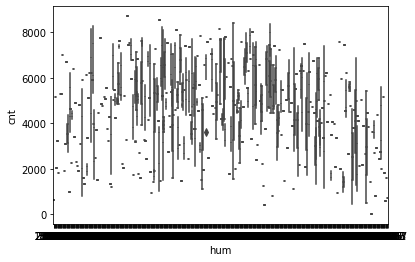

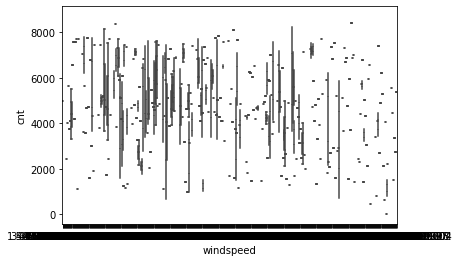

In [9]:
#Visualize categorical variables
#Make a box plot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()
sns.boxplot(x = 'temp', y = 'cnt', data = bikesharing)
plt.show()
sns.boxplot(x = 'hum', y = 'cnt', data = bikesharing)
plt.show()
sns.boxplot(x = 'windspeed', y = 'cnt', data = bikesharing)
plt.show()

- As per above graphs, It's very evident that there's a high correlation between temp and atemp, Let's drop one of them (atemp)
- We know that we will only be considering 'cnt' as our target variable, we won't be considering 'registered' or 'casual' as per given problem statement, so let's drop them too.
- 'instant' is just the record index, which we don't need to consider for model training, so let's drop that too.

In [10]:
columns_to_drop = ['atemp','casual','registered','instant']
bikesharing.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
#Since we already have 2 separate columns to identify the year and month, we can go ahead and drop dteday from the dataset
bikesharing.drop('dteday', axis=1, inplace=True)

### Prepare the data for modeling 
- Dealing with numeric labels 
    - Handling variables having numeric labels is important because in most cases, these numeric labels don't follow any specific order. Example: 1='Spring', 2='Summer', 3='Fall', 4='Winter'
    - These values need to be converted into categorical variables in order to ensure that the model does not treat them as continuous variables having a specific order.
- Dummy variables
    - Dummy variables represent categorical data in 0,1 format, A format which can be understood by the model. These variables (0,1) indicate whether a certain category is present / absent for each record.
- Rescaling
- Train-Test Split

In [12]:
#Converting feature variables to Categorical variables
bikesharing['season'].unique()
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bikesharing['season'] = bikesharing['season'].map(season_mapping)
bikesharing['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [13]:
#Creating dummy variables for season 
season_status = pd.get_dummies(bikesharing['season'].unique())
print(season_status)
#1000 - Spring
#0100 - Summer
#0010 - Fall
#0001 - Winter

#If you have k categorical variables, you can have k-1 dummy variables
#So above can be considered using only last 3 columns
#000 - Spring,100 - Summer,010 - Fall,001 - Winter

#Drop the first column
season_status = pd.get_dummies(bikesharing['season'], drop_first=True)
season_status

   Fall  Spring  Summer  Winter
0     0       1       0       0
1     0       0       1       0
2     1       0       0       0
3     0       0       0       1


,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [14]:
#Concat dummy variable with original one
#axis = 1 is column, axis = 0 is row
bikesharing = pd.concat([bikesharing, season_status], axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,Spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,Spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,Spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,Spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [15]:
#Converting feature variables to Categorical variables
bikesharing['weathersit'].unique()
weathersit_mapping = {1: 'Sunny', 2: 'Foggy', 3: 'Snowy', 4: 'Stormy'}
bikesharing['weathersit'] = bikesharing['weathersit'].map(weathersit_mapping)
bikesharing['weathersit'].unique()

array(['Foggy', 'Sunny', 'Snowy'], dtype=object)

In [16]:
#Creating dummy variables for weathersit
#bikesharing['weathersit'].unique()
#weathersit Type 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Has no entry in data, so let's consider weathersit to have just 3 values
weathersit_status = pd.get_dummies(bikesharing['weathersit'])
print(weathersit_status)
#100 - Clear, Few clouds, Partly cloudy, Partly cloudy
#010 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#001 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#As we have seen earlier, If you have k categorical variables, you can have k-1 dummy variables
#So above can be considered using only last 2 columns
#00 - Clear, Few clouds, Partly cloudy, Partly cloudy
#10 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#01 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

#Drop the first column
weathersit_status = pd.get_dummies(bikesharing['weathersit'], drop_first=True)
weathersit_status

     Foggy  Snowy  Sunny
0        1      0      0
1        1      0      0
2        0      0      1
3        0      0      1
4        0      0      1
..     ...    ...    ...
725      1      0      0
726      1      0      0
727      1      0      0
728      0      0      1
729      1      0      0

[730 rows x 3 columns]


,Snowy,Sunny
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
725,0,0
726,0,0
727,0,0
728,0,1


In [17]:
#Concat dummy variable with original one
#axis = 1 is column, axis = 0 is row
bikesharing = pd.concat([bikesharing, weathersit_status], axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Snowy,Sunny
0,Spring,0,1,0,6,0,Foggy,14.110847,80.5833,10.749882,985,1,0,0,0,0
1,Spring,0,1,0,0,0,Foggy,14.902598,69.6087,16.652113,801,1,0,0,0,0
2,Spring,0,1,0,1,1,Sunny,8.050924,43.7273,16.636703,1349,1,0,0,0,1
3,Spring,0,1,0,2,1,Sunny,8.200000,59.0435,10.739832,1562,1,0,0,0,1
4,Spring,0,1,0,3,1,Sunny,9.305237,43.6957,12.522300,1600,1,0,0,0,1


In [18]:
#We have created separate columns with binary values to identify these columns, so we can go ahead and drop these.
columns_to_drop = ['season', 'weathersit']
bikesharing.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
bikesharing.shape

(730, 14)

#### Train - Test Split

In [20]:
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 14)
(219, 14)


#### Rescaling
- Rescaling is a very important step which brings all the feature values to the same scale (within a particular range).
- Variables containing large values (Ex: humidity) can dominate over the small values and model might end up giving more importance to features with these large values.
- Also, the categorical variables (season, weathersit) were earlier encoded to binary form (0,1) so not performing scaling on the dataset where data ranges are spread out will result in the model favoring variables with large values and giving inaccurate predictions.
- Some commonly used re-scaling techniques are: 
    - Min Max Scaling
        - Takes care of outliers
        - (x- xmin)/(xmax-xmin)
    - Standardisation
        - (mean=0 and sigma=1) => (x-mu)/sigma
 
 For this case study, Let's go with the Min Max scaling approach

In [21]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [22]:
# Scaling will be applied only for numeric variables excluding 
print(bikesharing.head())
numeric_vars = ['mnth','weekday','temp','hum','windspeed','cnt']
#print(bikesharing.shape)

   yr  mnth  holiday  weekday  workingday       temp      hum  windspeed  \
0   0     1        0        6           0  14.110847  80.5833  10.749882   
1   0     1        0        0           0  14.902598  69.6087  16.652113   
2   0     1        0        1           1   8.050924  43.7273  16.636703   
3   0     1        0        2           1   8.200000  59.0435  10.739832   
4   0     1        0        3           1   9.305237  43.6957  12.522300   

    cnt  Spring  Summer  Winter  Snowy  Sunny  
0   985       1       0       0      0      0  
1   801       1       0       0      0      0  
2  1349       1       0       0      0      1  
3  1562       1       0       0      0      1  
4  1600       1       0       0      0      1  


#### MinMaxScaler - 3 methods
- fit - learns xmin and xmax
- transform - does (x- xmin)/(xmax-xmin)
- fit_transform - one method to do both fit and transform

In [23]:
#Scaling will be applied to all the columns except the yes-no, 'dummy' variables and categorical variables
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
print(df_train.head())
print(df_train.describe())

     yr      mnth  holiday   weekday  workingday      temp       hum  \
653   1  0.818182        0  0.333333           1  0.509887  0.575354   
576   1  0.545455        0  0.333333           1  0.815169  0.725633   
426   1  0.181818        0  1.000000           0  0.442393  0.640189   
728   1  1.000000        0  0.000000           0  0.245101  0.498067   
482   1  0.272727        0  1.000000           0  0.395666  0.504508   

     windspeed       cnt  Spring  Summer  Winter  Snowy  Sunny  
653   0.300794  0.864243       0       0       1      0      1  
576   0.264686  0.827658       0       0       0      0      1  
426   0.255342  0.465255       1       0       0      0      0  
728   0.663106  0.204096       1       0       0      0      1  
482   0.188475  0.482973       0       1       0      0      0  
               yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.5078

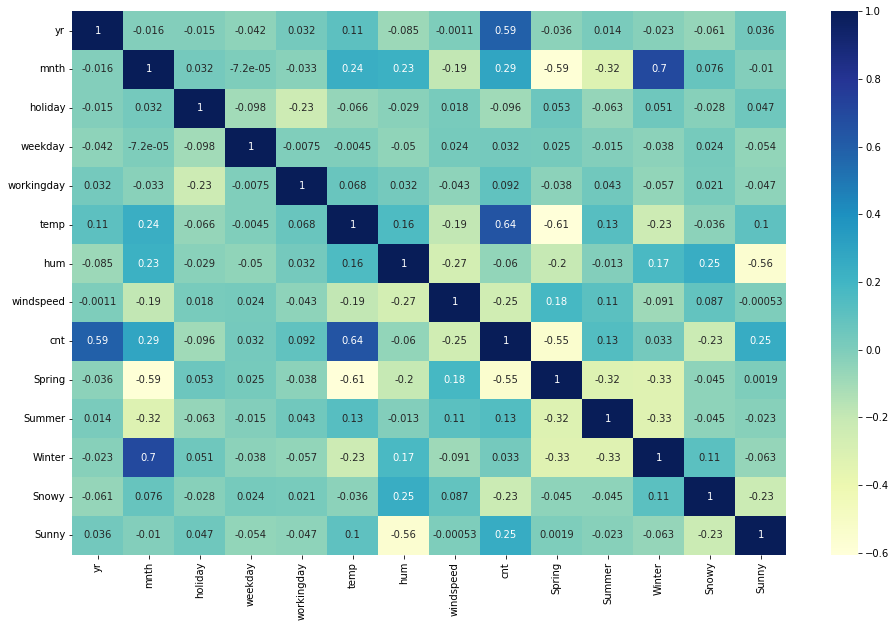

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Training the model 
- Let's use Backward elimination approach for this case study
    - Adding all variables to the model and eliminating one by one (least relevant variables) and retraining the model each time until we land with a subset of variables which contribute the the model's performance.

#### Points to consider during elimination
- Drop variables based on significance (p-value => high - less significant, low - more significant)
- VIF - Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test the linear model. Helps with identifying multicollinearity.
- Scenarios
    - High P, high VIF - drop
    - Low P, Low VIF - retain
    - High P, Low VIF - remove these first and re-build.
    - Low P, High VIF - remove these next after re-building.
    
Note: VIF <= 5, P-value <=0.05


In [25]:
#List all columns we'll be working with
bikesharing.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'Spring', 'Summer', 'Winter', 'Snowy', 'Sunny'],
      dtype='object')

In [26]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
#Adding a constant - Column of all 1's to the input data (X_train)
X_train_lm = sm.add_constant(X_train)  
#OLS - Ordinary Least Squares - Estimates coefficients of a linear regression model 
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const         0.181641
yr            0.232093
mnth          0.012629
holiday      -0.064654
weekday       0.048288
workingday    0.018797
temp          0.492661
hum          -0.125327
windspeed    -0.180300
Spring       -0.069112
Summer        0.046820
Winter        0.086767
Snowy        -0.190264
Sunny         0.058301
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.31e-183
Time:                        22:01:55   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                      

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,25.33
5,temp,19.02
1,mnth,12.87
8,Spring,5.15
7,windspeed,4.76
10,Winter,4.64
12,Sunny,3.57
4,workingday,3.20
3,weekday,3.15
9,Summer,2.80


#### Summary of 1st run
- Model name: lr_1
- R-squared: 0.834
- Based on above summary, Let's drop mnth first.
    - Reasoning
        - mnth - p-value=0.624 (should be less than or equal to 0.05) => HIGH
        - VIF - 12.87 (should be less than or equal to 5) => HIGH, Indicates multicollinearity.
    - Let's drop mnth and retrain the model

In [29]:
#Dropping mnth
X = X_train.drop('mnth', 1,)

In [30]:
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.00e-184
Time:                        22:01:55   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1873      0.040      4.634      0.0

,Features,VIF
5,hum,22.37
4,temp,18.37
6,windspeed,4.68
7,Spring,4.43
11,Sunny,3.42
9,Winter,3.41
3,workingday,3.20
2,weekday,3.10
8,Summer,2.38
0,yr,2.08


#### Summary of 2nd run
- Model name: lr_2
- R-squared: 0.834 (No change from first run)
- Based on above summary, Let's drop 'hum' next.
- Reasoning
    - Although p-value looks fine, 
    - VIF - 22.37 (should be less than or equal to 5) => HIGH, Indicates multicollinearity.
- Let's drop hum and retrain the model

In [31]:
#Dropping 'mnth'
X = X.drop('hum', 1,)

#Retrain model
#Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_3.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          9.96e-184
Time:                        22:01:55   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1024      0.031      3.335      0.0

,Features,VIF
4,temp,6.16
5,windspeed,4.66
3,workingday,3.14
2,weekday,3.08
10,Sunny,2.84
6,Spring,2.36
0,yr,2.07
7,Summer,1.83
8,Winter,1.75
9,Snowy,1.11


#### Summary of 3rd run
- Model name: lr_3
- R-squared: 0.830 (slight drop in R-squared)
- Based on above summary, Let's drop 'temp' next. Although temp seems like a very relevant variable, let's drop and check for accuracy, if not we can add it back again.
- Reasoning
    - VIF - 6.16 (should be less than or equal to 5) => HIGH => Indicates multicollinearity.
- Let's drop temp and retrain the model

In [32]:
#Dropping 'temp'
#X = X.drop('temp', 1,)

#Retrain model
#Build a third fitted model
#X_train_lm = sm.add_constant(X)

#lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
# print(lr_4.summary())

# # Calculate the VIFs again for the new model
# vif = pd.DataFrame()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

## Commenting this because dropping temp decreased the R-squared value.

- Dropping temp decreased the value of R-squared considerably, so let's add this back.
- Let's consider lr_3 which has temp and has an R-squared value of 0.830 and Ajusted R-sqaured value of 0.826
- At this point lr_3 model has addressed most of the multicollinearity issues and we have a reasonably good model. Let's go ahead with further steps.

### Residual Analysis
- Now let's check if the error terms are also normally distributed by plotting the histogram of the error terms and see what it looks like.

In [34]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

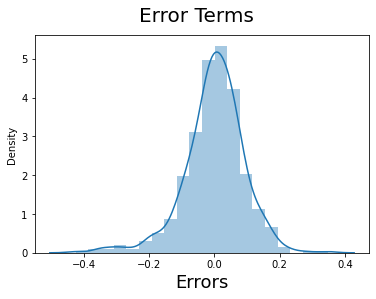

In [35]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- We can see that the residuals are scattered around 0 as expected. So let's move further.

### Predictions and Evaluations
Now that we have fitted the model and checked the Error distribution, let's go ahead and make predictions using the final, i.e. lr_3

Rescaling test sets
- This is an important step because we have trained the data with scaled values, so we if pass data which is in a different scale or range for test set then the predictions will not be accurate. 
- Notice that this time around we are only doing transform on the test data set and not fit_transform. This is because we will use the same scaling rules from training data set (xmin, xmax) to scale the test dataset.

In [36]:
# IMPORTANT - Applying the scaling on the test sets
numeric_vars = ['mnth','weekday','temp','hum','windspeed','cnt']

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Snowy,Sunny
184,0,0.545455,1,0.166667,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0
535,1,0.454545,0,0.500000,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,1
299,0,0.818182,0,0.666667,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0
221,0,0.636364,0,0.500000,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1
152,0,0.454545,0,0.666667,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,1


In [37]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Snowy,Sunny
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.503044,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.652968
std,0.500722,0.311080,0.188034,0.331402,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [39]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [40]:
X_test_m3.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'hum', 'windspeed', 'Spring', 'Summer', 'Winter', 'Snowy', 'Sunny'],
      dtype='object')

In [41]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3 which was dropped during model building

X_test_m3 = X_test_m3.drop(["mnth", "hum"], axis = 1)

In [42]:
# Making predictions using the final model

y_pred_m3 = lr_3.predict(X_test_m3)

In [43]:
#Evaluate model - compute R squared
r2 = r2_score(y_true=y_test, y_pred=y_pred_m3)
r2

0.8050115817924299

Text(0, 0.5, 'y_pred')

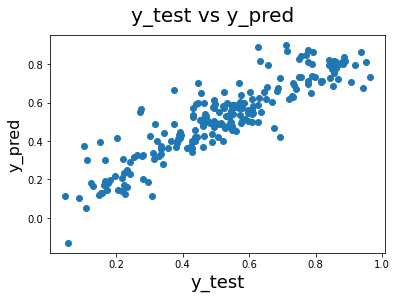

In [44]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### Conclusion: R-squared value of 0.805 indicates that the model (in our case: y_pred_m3) can explain 80.5% of variability in the target variable (y_test) which suggests that the model is performing reasonably well.